<a href="https://colab.research.google.com/github/anunav83/JobSkillSearch--NLP/blob/master/Project_Job_search_by_skill_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
from sklearn.model_selection import train_test_split 

# DataSet Preview / Description

In [0]:
from google.colab import files
uploaded = files.upload()

Saving df_JobsTable_bck.csv to df_JobsTable_bck (1).csv


In [0]:
df_JobsTable = pd.read_csv("df_JobsTable_bck.csv")
df_JobsTable.head()

,Unnamed: 0,Title,Company,Location,PostingDt,keywords,FullTime,ExperienceLevel,Education,Source,link,TotalSkills,IsaDataScientist,language,comfort,vba,perl,speech,spreadsheet,edition,ruby,net,pig,algorithm,servers,scipy,matlab,vbscript,sharp,spss,querying,intermediate,javascript,gaming,vb,interpreted,sas,productionalizing,numpy,analysisskills,...,postgresql,wrangling,stata,scripting,sqlknowledge,db2,viewing,window,r,netezza,clojure,mysql,event,reasoning,anaconda,statically,typed,compiled,pl,jenkins,graph,bash,nosql,redshift,git,regularization,os,joins,packages,hql,tensorflow,sparkexperience,shell,xml,advantageous,numerical,alteryx,keras,pytorch,bootstrapping
0,1,data scientist,university of california - san francisco,"san francisco, ca",7/10/2018,"san,francisco,ca,582291535,full,time,regular,j...",Full Time,Entry Level (0 - 2 years),Bachelors Degree,AJE,http://www.americasjobexchange.com/job-detail/...,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,2,data scientist,boston consulting group,"san francisco, ca",7/2/2019,"san,francisco,ca,584339071,full,time,regular,d...",Full Time,Mid-Career (2 - 15 years),Bachelors Degree,AJE,http://www.americasjobexchange.com/job-detail/...,5,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,3,data scientist,university of california - san francisco,"san francisco, ca",7/6/2019,"san,francisco,ca,584377757,full,time,regular,5...",Full Time,Mid-Career (2 - 15 years),Bachelors Degree,AJE,http://www.americasjobexchange.com/job-detail/...,11,True,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False
3,4,data scientist,salesforce.com,"san francisco, ca",6/29/2019,"san,francisco,ca,584330251,full,time,regular,j...",Full Time,Entry Level (0 - 2 years),Bachelors Degree,AJE,http://www.americasjobexchange.com/job-detail/...,19,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,True,False,...,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True
4,5,data scientist,university of california - san francisco,"san francisco, ca",5/18/2019,"san,francisco,ca,584105024,full,time,regular,5...",Full Time,Mid-Career (2 - 15 years),Bachelors Degree,AJE,http://www.americasjobexchange.com/job-detail/...,2,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


### DataSet Description

* **Title** : Job Title
* **Company**: company posting the job
* **Location** : Job location. only one specified
* **PostingDt** : Job Posting Date
* **FullTime**: Job could be fulltime or partime
* **ExperienceLevel**: entry level, mid career etc
* **Education**: Degree required for the job.
* **TotalSkills** : It is number of the True values in the rest of the columns that have skills.( e.g if the row has matlab=true and perl = true and the rest of the columns as false Total Skills is 2)
* **Link**: Link to the job posting
* **Source**: Source of the job posting, CB is career builder, IN is indeed and AJE is american jobs exchange.
* **IsaDataScientist** : This is our target column. Is set to true when the job posting is an actual 'Data Scientist post.'


NOTE: Currently Fulltime, Experience and Eduction is available only from one job source, hence we will exclude these columns for now.

In [0]:
df_JobsTable_final = df_JobsTable.drop(columns=['Unnamed: 0','Title','Company', 'Location','PostingDt','FullTime','ExperienceLevel','Education','Source','link','keywords'])

# 1. Exploratory Data Analysis

In [0]:
Total_skills = pd.DataFrame(df_JobsTable.sum())
Total_skills = pd.DataFrame(Total_skills.iloc[8:82,])
Total_skills.reset_index(inplace=True)
Total_skills.columns =["skill","jobCount"]
Total_skills.sort_values(by=['jobCount'], inplace=True)
Total_skills["PercentageOfJob"] = (Total_skills["jobCount"]/221) * 100
Total_skills

,skill,jobCount,PercentageOfJob
40,viewing,1,0.452489
26,analysisskills,1,0.452489
21,vb,1,0.452489
31,pythonknowledge,1,0.452489
33,conda,1,0.452489
63,hql,1,0.452489
38,sqlknowledge,1,0.452489
14,vbscript,1,0.452489
39,db2,1,0.452489
24,productionalizing,1,0.452489


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


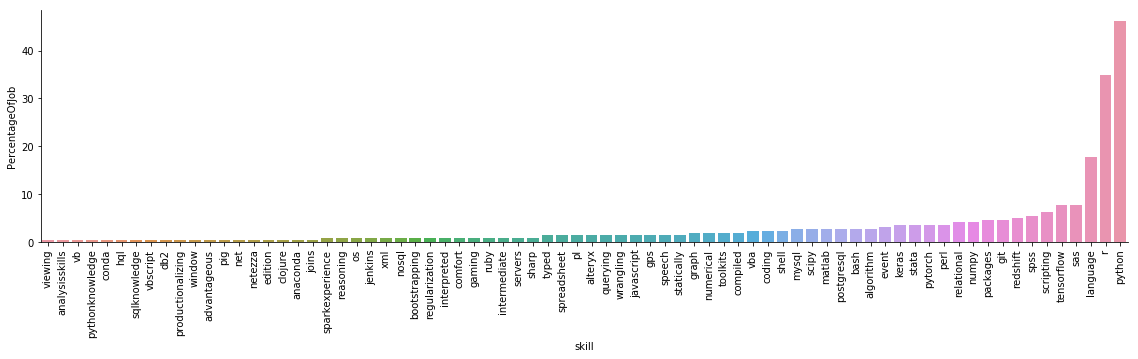

In [0]:
g= sns.catplot(x="skill", y="PercentageOfJob", data=Total_skills, kind="bar", size=4, aspect=4)
g.set_xticklabels(rotation=90)


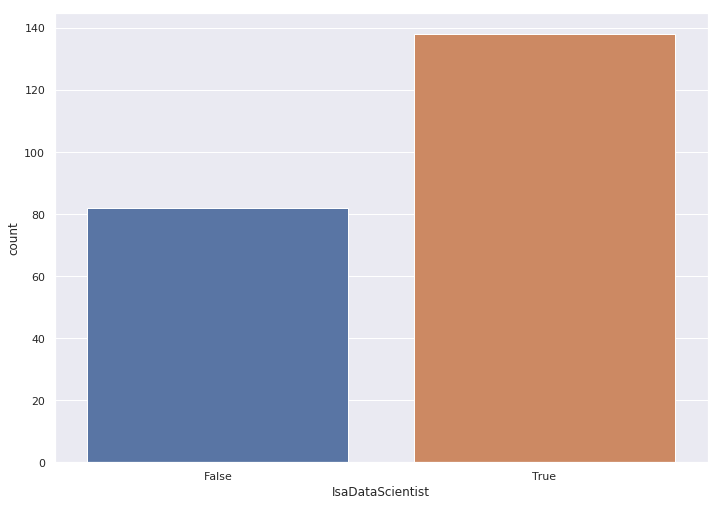

In [0]:
# Relation between total skills and the isDataScientist response variable
sns.set_style("whitegrid") 
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x="IsaDataScientist",data=df_JobsTable_final);


In [0]:
df_JobsTable_final_2 = df_JobsTable_final

df_JobsTable_final_2["TotalSkills_MoreThan1"] = df_JobsTable_final['TotalSkills']>1

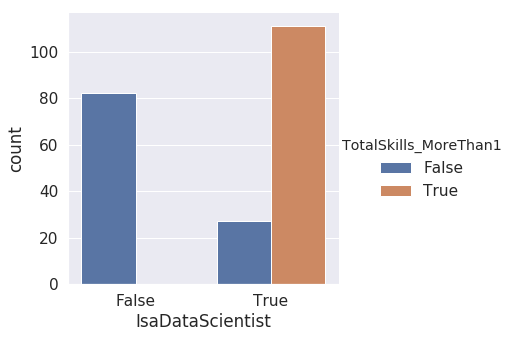

In [0]:

sns.catplot(x="IsaDataScientist", hue="TotalSkills_MoreThan1", kind="count",data=df_JobsTable_final_2);

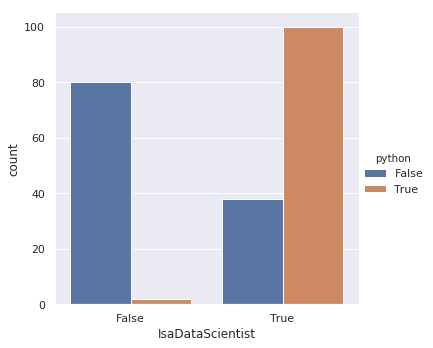

In [0]:
# Relation between total skills and the isDataScientist response variable
sns.catplot(x="IsaDataScientist", hue="python", kind="count",data=df_JobsTable_final);

# It appears almost all of the python jobs are data scientist jobs

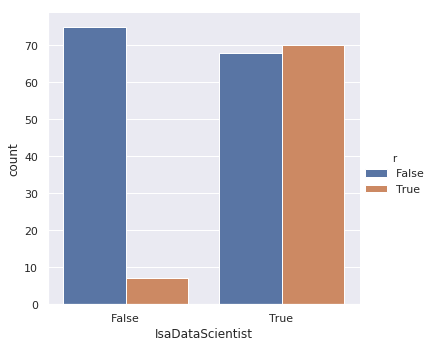

In [0]:
sns.catplot(x="IsaDataScientist", hue="r", kind="count",data=df_JobsTable_final);

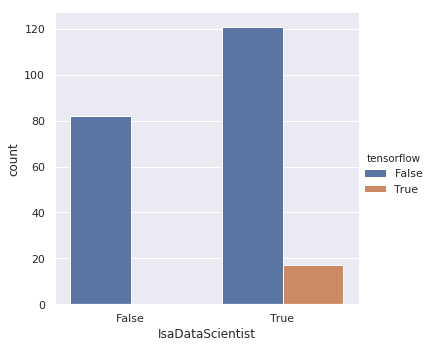

In [0]:
sns.catplot(x="IsaDataScientist", hue="tensorflow", kind="count",data=df_JobsTable_final);

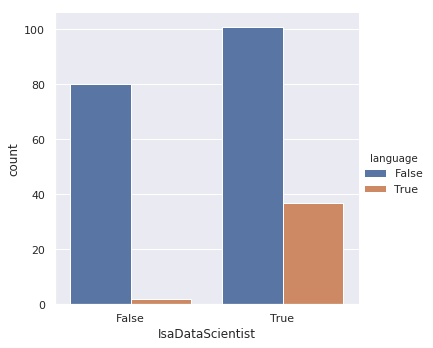

In [0]:
sns.catplot(x="IsaDataScientist", hue="language", kind="count",data=df_JobsTable_final);

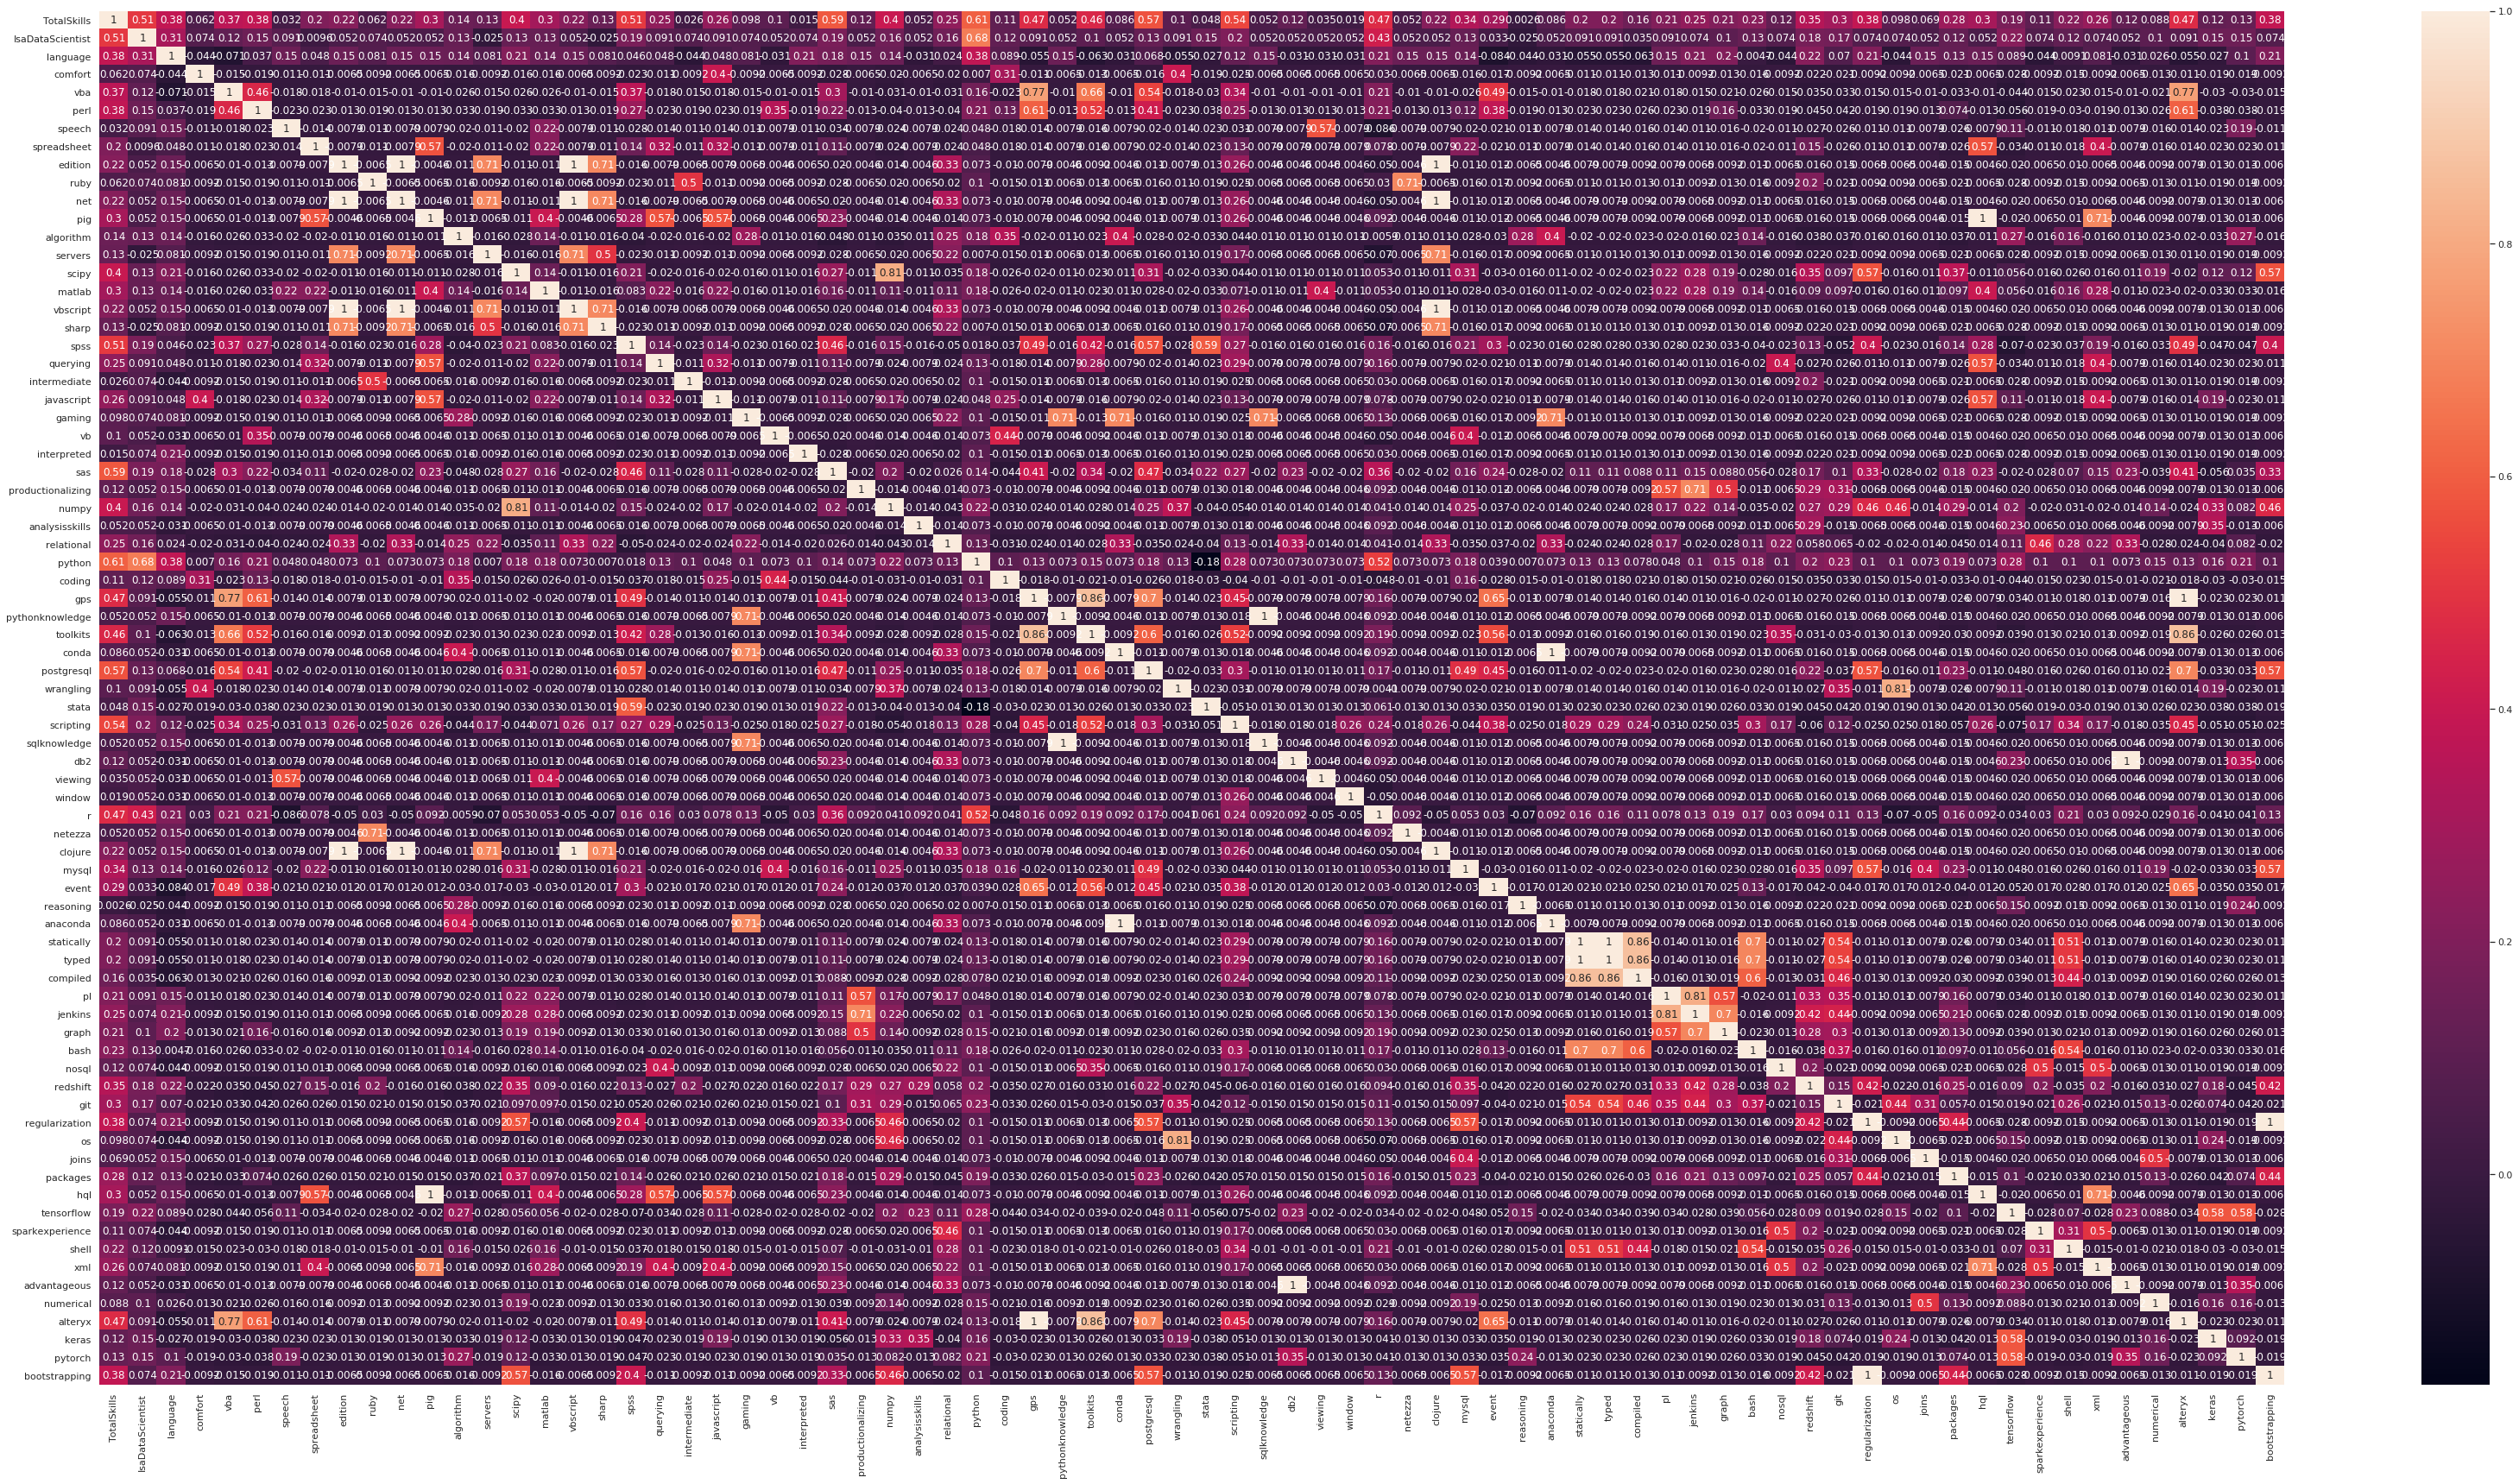

In [0]:
corr = df_JobsTable_final.corr()

sns.set(style="white")
sns.set(rc={'figure.figsize':(56.7,29.27)})
sns.heatmap(corr,annot=True)

# 2.  Modelling and Evaluation 

### Naive bayes

In [0]:
X = df_JobsTable_final[['TotalSkills','python']]

y = df_JobsTable_final['IsaDataScientist']
                      
                      
                      
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(176, 2)
(44, 2)
(176,)
(44,)


In [0]:
# training a Naive Bayes classifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

gnb_model = GaussianNB()

gnb_model_fit =gnb_model.fit(X_train, y_train) 


In [0]:
y_pred_gnb = gnb_model_fit.predict(X_test) 
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_gnb) * 100))
print("\nConfusion Matrix gnb:\n", confusion_matrix(y_test, y_pred_gnb))

Accuracy: 81.82%

Confusion Matrix gnb:
 [[13  0]
 [ 8 23]]


Text(0.5, 1.0, 'Confusion Matrix')

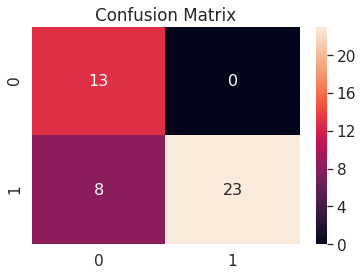

In [0]:
import seaborn as sn
cm = confusion_matrix(y_test, y_pred_gnb)
df_cm = pd.DataFrame(cm, range(2),range(2))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})
plt.title('Confusion Matrix')

###Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)
logreg_fit = logreg.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
y_pred_logreg = logreg_fit.predict(X_test)
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_logreg) * 100))
print("\nConfusion Matrix logreg:\n", confusion_matrix(y_test, y_pred_logreg))

Accuracy: 81.82%

Confusion Matrix logreg:
 [[13  0]
 [ 8 23]]


Text(0.5, 1.0, 'Confusion Matrix')

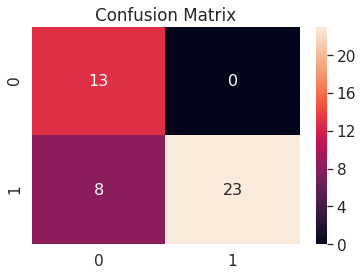

In [0]:
cm = confusion_matrix(y_test, y_pred_logreg)
df_cm = pd.DataFrame(cm, range(2),range(2))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})
plt.title('Confusion Matrix')

# **Conclusion**:
Both Algorithms produces the same accuracy. So either one can be used on this data.

# Test Unseen Data

In [0]:
# Verifying on test job description, on unseen data. Below is the Job desc of data Scientist job 
# https://www.indeed.com/viewjob?jk=0f86bada4b4ed076&qd=gMF-077E7aWVyicXRrUZA9egzeZ3T2dBgeDfNnaoLkJJmFnhCc7dJ1vy7fTW7S1KSWD-go1WZYhTR1F1n9_J2DyjrCt1SuPYI7hYajL-ti6ptQI94s5DsPOzRyYMc52A&chnl=careeronestop&atk=1dg95rg6dhbvr800&utm_source=publisher&utm_medium=organic_listings&utm_campaign=affiliate

jobDesc ='Founded in 2008, Airbnb exists to create a world where anyone can belong anywhere, providing healthy travel that is local, authentic, diverse, inclusive and sustainable. Airbnb uniquely leverages technology to economically empower millions of people around the world to unlock and monetize their spaces, passions and talents to become hospitality entrepreneurs.Airbnb\'s accommodation marketplace provides access to 5+ million unique places to stay in more than 81,000 cities and 191 countries. With Experiences, Airbnb offers unprecedented access to local communities and interests through 15,000+ unique, handcrafted activities run by hosts across 1,000+ markets around the world. Airbnb\'s people-to-people platform benefits all its stakeholders, including hosts, guests, employees and the communities in which it operates. Airbnb\'s Marketing Data Science is looking to hire a Data Scientist based in San Francisco.The ideal candidate will have:PhD in Econometrics, Statistics, Economics or Marketing (or similar skillset)Experience in measurement of offline advertising AND experience in development of Customer Lifetime Value modelsPassion for the subject; curiosity and desire to continuously keep up with academic research on marketing science and customer scienceAbility to solve business problems using wide variety of statistical methods and modelsSkill in statistical programming (R, Python) and database usage (SQL, HIVE) The role is responsible for: Designing experiments to measure the effectiveness of Airbnb\'s offline advertising and the effectiveness of content / features on our website / app Generating insights about the company\'s most valuable guests and hosts, and differences relative to the company\'s least valuable guests and hosts Generating insights to improve ad effectiveness and to optimize spend by audience segment and by channel, and working with Marketing partners to implement Participating actively in Airbnb data science community to improve the company\'s technical capabilities (in addition to developing your own!) Benefits Stock $2,000 yearly employee travel coupon Competitive salary Paid time off Medical, dental, & vision insurance Life & disability coverage 401K Flexible Spending Accounts Apple equipment Daily breakfast, lunch, and dinner We are an equal opportunity employer and value diversity at our company. We do not discriminate on the basis of race, religion, color, national origin, gender, sexual orientation, age, marital status, veteran status, or disability status'
jobDesc

"Founded in 2008, Airbnb exists to create a world where anyone can belong anywhere, providing healthy travel that is local, authentic, diverse, inclusive and sustainable. Airbnb uniquely leverages technology to economically empower millions of people around the world to unlock and monetize their spaces, passions and talents to become hospitality entrepreneurs.Airbnb's accommodation marketplace provides access to 5+ million unique places to stay in more than 81,000 cities and 191 countries. With Experiences, Airbnb offers unprecedented access to local communities and interests through 15,000+ unique, handcrafted activities run by hosts across 1,000+ markets around the world. Airbnb's people-to-people platform benefits all its stakeholders, including hosts, guests, employees and the communities in which it operates. Airbnb's Marketing Data Science is looking to hire a Data Scientist based in San Francisco.The ideal candidate will have:PhD in Econometrics, Statistics, Economics or Marketi

In [0]:
from nltk.tokenize import RegexpTokenizer
import re
WOneJob =[]
WOneLine =[]

jobDesc = str(jobDesc).lower()
tokenizer = RegexpTokenizer(r'\w+')
jobDesc = re.sub('[^a-z0-9]+', ' ', jobDesc).strip()
jobDesc=tokenizer.tokenize(str(jobDesc).strip())
jobDesc

['founded',
 'in',
 '2008',
 'airbnb',
 'exists',
 'to',
 'create',
 'a',
 'world',
 'where',
 'anyone',
 'can',
 'belong',
 'anywhere',
 'providing',
 'healthy',
 'travel',
 'that',
 'is',
 'local',
 'authentic',
 'diverse',
 'inclusive',
 'and',
 'sustainable',
 'airbnb',
 'uniquely',
 'leverages',
 'technology',
 'to',
 'economically',
 'empower',
 'millions',
 'of',
 'people',
 'around',
 'the',
 'world',
 'to',
 'unlock',
 'and',
 'monetize',
 'their',
 'spaces',
 'passions',
 'and',
 'talents',
 'to',
 'become',
 'hospitality',
 'entrepreneurs',
 'airbnb',
 's',
 'accommodation',
 'marketplace',
 'provides',
 'access',
 'to',
 '5',
 'million',
 'unique',
 'places',
 'to',
 'stay',
 'in',
 'more',
 'than',
 '81',
 '000',
 'cities',
 'and',
 '191',
 'countries',
 'with',
 'experiences',
 'airbnb',
 'offers',
 'unprecedented',
 'access',
 'to',
 'local',
 'communities',
 'and',
 'interests',
 'through',
 '15',
 '000',
 'unique',
 'handcrafted',
 'activities',
 'run',
 'by',
 'hosts'

In [0]:

test_obs = pd.DataFrame(columns=["TotalSkills"])


,TotalSkills


In [0]:

totalskills = 0
row=""
index = 0
for skill in Total_skills['skill']:
  test_obs[skill] = ""
  if skill in jobDesc :
      row = row + 'True,'
      totalskills = totalskills + 1
  else:
      row = row + 'False,'
  
  index = index + 1

row = str(totalskills) +',' + row
row = row.split(',')
row.remove('')

def change(f):
    if f == 'False':
        return False
    elif f == 'True':
        return True
    else:
        return int(f)
      
row = list(map(change, row))
 

In [0]:
test_obs.loc[0] = row
test_obs

,TotalSkills,viewing,analysisskills,vb,pythonknowledge,conda,hql,sqlknowledge,vbscript,db2,productionalizing,window,advantageous,pig,net,netezza,edition,clojure,anaconda,joins,sparkexperience,reasoning,os,jenkins,xml,nosql,bootstrapping,regularization,interpreted,comfort,gaming,ruby,intermediate,servers,sharp,typed,spreadsheet,pl,alteryx,querying,wrangling,javascript,gps,speech,statically,graph,numerical,toolkits,compiled,vba,coding,shell,mysql,scipy,matlab,postgresql,bash,algorithm,event,keras,stata,pytorch,perl,relational,numpy,packages,git,redshift,spss,scripting,tensorflow,sas,language,r,python
0,2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True


In [0]:
test_obs = test_obs[['TotalSkills','python']]
test_obs

,TotalSkills,python
0,2,True


In [0]:
y_pred_logreg = logreg.predict(test_obs)
y_pred_logreg

array([ True])

The model correctly identified it as Data scientist.